In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [3]:
tips = sns.load_dataset("tips")

In [5]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [7]:
tips.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


C:\Users\numan\AppData\Local\Temp\ipykernel_13556\683670261.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x="day",y="total_bill",data=tips,ci=95);


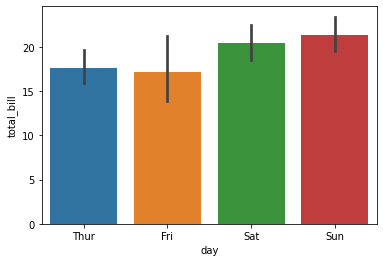

In [8]:
sns.barplot(x="day",y="total_bill",data=tips,ci=95);

In [14]:
xbar = tips[tips["day"]=="Fri"]["total_bill"].mean()
xbar

17.151578947368417

In [15]:
s = tips[tips["day"]=="Fri"]["total_bill"].std()
s

8.302659723217143

In [17]:
n = tips[tips["day"]=="Fri"]["total_bill"].count()
n

19

In [18]:
s/ np.sqrt(n)   #standart error of the mean

1.904760773479416

In [19]:
sem = tips[tips["day"]=="Fri"]["total_bill"].sem()
sem

1.904760773479416

Calculate the margin of the error

In [21]:
# for 95% confidence level
moe = 1.96 *sem
moe

3.7333311160196554

how to calculate z critical value

In [24]:
z = stats.norm.ppf(0.975)

In [27]:
# for 95% confidence level
moe = z *sem
moe

3.7332625151843115

Calculate lower confidence limit

In [28]:
lower_limit = xbar-moe
lower_limit

13.418316432184106

In [29]:
upper_limit = xbar+moe
upper_limit

20.88484146255273

In [34]:
stats.norm.interval(alpha=0.95, loc=xbar, scale=sem)

(13.418316432184106, 20.88484146255273)

In [38]:
stats.t.interval(alpha=0.95,df=n-1, loc=xbar, scale=sem)

(13.149825056979093, 21.15333283775774)

In [39]:
stats.t.interval(alpha=0.95,
                 df=(tips[tips["day"]=="Sat"]["total_bill"].count())-1,
                 loc=(tips[tips["day"]=="Sat"]["total_bill"].mean()),
                 scale=(tips[tips["day"]=="Sat"]["total_bill"].sem()))

(18.420827942450163, 22.461930678239487)